In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [5]:
"""
Trying an example code.
"""


# takes 16 seconds
p = 0.5
# number of steps of a random walker:
N = 10000
# number of random walkers generated:
num_samples = 5000
# Starting the walker from different initial states. By adding or subtracting an amount from the position,
# we can easily simulate the changing of the initial state. For example if you want to start the walker
# from position 9, instead of 0, just start the walker from 0, and then add 9 to its position.
# Each of the values of initial_place will be tested. We will start the walker from -19, -18, -17, ..., 18 and 19.
initial_place = np.arange(-19, 19+1, dtype=int)
# Note to Self: We don't take snapshots for this exercise!
# Each row of data corresponds to the lifetime of one walker. If a walker starts from different starting positions,
# how many steps will it take before reaching -20 or 20 and fall in the traps and die?
data = np.zeros((num_samples, len(initial_place)), dtype=int)

for i in range(len(initial_place)):
    for j in range(num_samples):
        # Generate one random walk and let it take N steps; record its position after every step it takes:
        position = np.cumsum((2 * (np.random.random(N) < p) - 1)) + initial_place[i]
        # Put one random walker's position into one row of data; it gets the first instance of the boolean condition:
        data[j,i] = np.where((position==20) | (position==-20))[0][0]

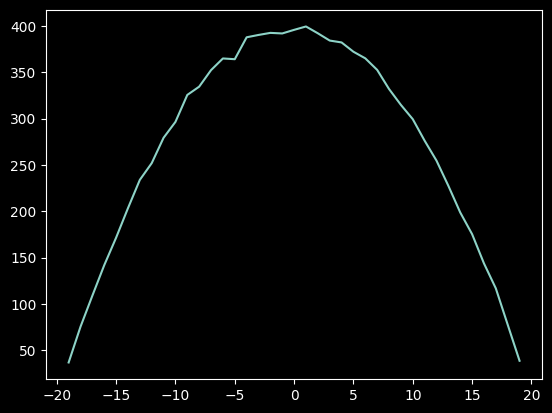

In [13]:
# Averaging over 5000 samples, for different initial places.
average_life_time = np.mean(data, axis=0)


fig, ax = plt.subplots()
ax.plot(initial_place, average_life_time);

In [7]:
"""
Turning the example code into a function.
"""


def avg_life_time(p: int=0.5, N: int=10000, num_samples: int=5000, traps: tuple=(-5,5)):
    """
    Initiates num_sample random walkers from different starting points within traps and returns
    their average life time.

    p: probability of taking a step right

    N: number of steps that a random walker takes

    num_samples: number of random walkers generated whose average life time will be returned.

    traps: a tuple stating the positions of the traps; traps[0] must be smaller than traps[1].
    """
    # Starting the walker from different initial states. By adding or subtracting an amount from the position,
    # we can easily simulate the changing of the initial state. For example if you want to start the walker
    # from position 9, instead of 0, just start the walker from 0, and then add 9 to its position.
    # Each of the values of initial_place will be tested.
    # For traps=(-20,20) we will start the walker from -19, -18, -17, ..., 18 and 19;
    # likewise for other values of traps.
    initial_place = np.arange(traps[0]+1, traps[1], dtype=int)
    # Each row of data corresponds to the lifetime of one walker.
    # If a walker starts from different starting positions,
    # how many steps will it take before it reaches -20 or 20 and fall in the traps and die?
    data = np.zeros((num_samples, len(initial_place)), dtype=int)

    for i in range(len(initial_place)):
        for j in range(num_samples):
            # Generate one random walk and let it take N steps; record its position after every step it takes:
            position = np.cumsum((2 * (np.random.random(N) < p) - 1)) + initial_place[i]
            # Put one random walker's position into one row of data;
            # it gets the first instance of the boolean condition:
            data[j,i] = np.where((position==traps[0]) | (position==traps[1]))[0][0]
    return np.mean(data, axis=0)

$\Large traps = (0,20)$

In [18]:
# 20 seconds for traps at -3 and 3
# 35 seconds for traps at -5 and 5
# 41 seconds for traps at -6 and 6
# Algorithm is O(N)
# Expecting 1 minute 10 seconds for trap at 0 and 20

# Set the position of the traps. They can also be non-symmetric around 0:
traps = (0,20)
# We're going to generate random walkers with all the values of probabilities:
probabilites = np.arange(0.1, 1, 0.1)
# Data of average lifetime for different probabilites p, and for different initial positions:
DDAATTAA = np.zeros((len(probabilites), abs(traps[1] - traps[0]) - 1))
# Generate the data for all the probabilities p in {0.1, 0.2, ..., 0.9}
for i in range(len(probabilites)):
    DDAATTAA[i, :] = avg_life_time(p=probabilites[i], traps=traps)

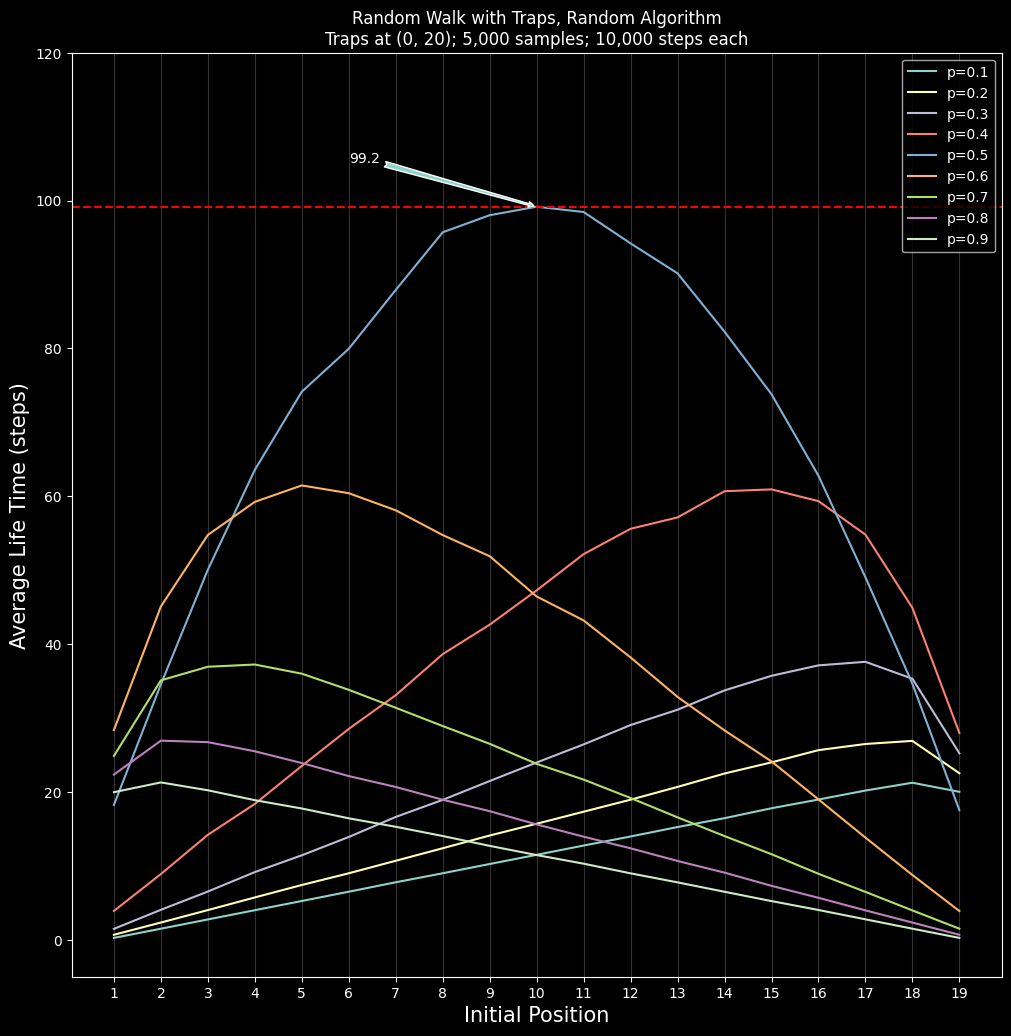

In [56]:
fig, ax = plt.subplots(figsize=(12,12))

# the x values for the plot (basically, it's just the initial positions):
xs = np.arange(traps[0]+1, traps[1], step=1)
# aesthetics:
ax.set_title(f"Random Walk with Traps, Random Algorithm\nTraps at {traps}; 5,000 samples; 10,000 steps each")
ax.set_xlabel("Initial Position", fontsize=15)
ax.set_ylabel("Average Life Time (steps)", fontsize=15)
ax.set_xticks(xs)
# ax.set_xticklabels(labels=xs, rotation=90)
ax.grid(axis="x", alpha=0.2)
# Plotting data:
for i in range(len(probabilites)):
    ax.plot(xs, DDAATTAA[i], label=f"p={probabilites[i]:.1f}")
ax.axhline(DDAATTAA[4].max(), color="red", linestyle="--")
ax.set_ylim((-5,120))
# ax.set_yticks(np.append(ax.get_yticks()[1:], DDAATTAA[4].max()))
ax.annotate(text=f"{DDAATTAA[4].max():.1f}", xy=(10, DDAATTAA[4].max()),
            xytext=(6, DDAATTAA[4].max()+6), arrowprops={"arrowstyle":"fancy", "connectionstyle":"arc3"})
ax.legend();

In [57]:
# fig.savefig("Exercise5_3_19.jpg")

$\Large traps = (0,40)$

In [58]:
# 20 seconds for traps at -3 and 3
# 35 seconds for traps at -5 and 5
# 41 seconds for traps at -6 and 6
# Algorithm is O(N)
# Expecting 2 minutes 20 seconds for trap at 0 and 40

# Set the position of the traps. They can also be non-symmetric around 0:
traps = (0,40)
# We're going to generate random walkers with all the values of probabilities:
probabilites = np.arange(0.1, 1, 0.1)
# Data of average lifetime for different probabilites p, and for different initial positions:
DDAATTAA = np.zeros((len(probabilites), abs(traps[1] - traps[0]) - 1))
# Generate the data for all the probabilities p in {0.1, 0.2, ..., 0.9}
for i in range(len(probabilites)):
    DDAATTAA[i, :] = avg_life_time(p=probabilites[i], traps=traps)

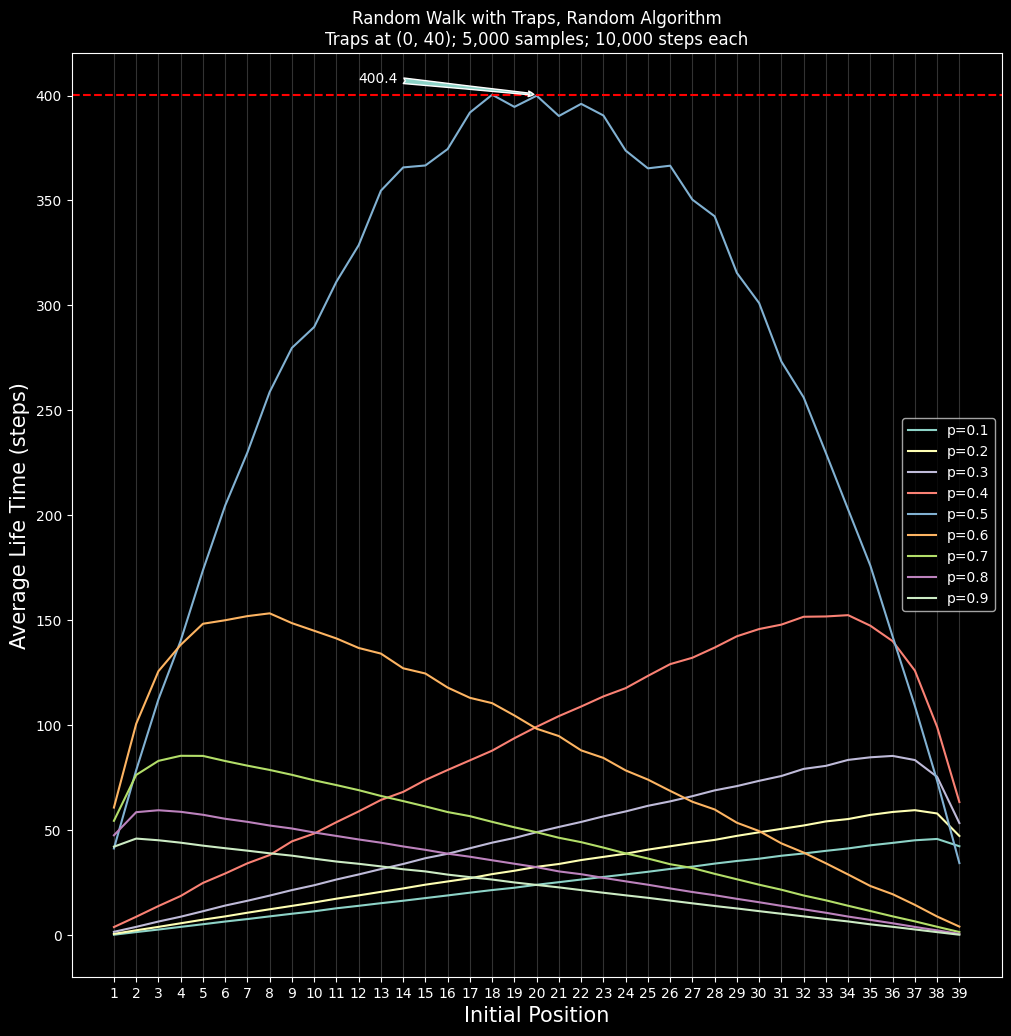

In [62]:
fig, ax = plt.subplots(figsize=(12,12))

# the x values for the plot (basically, it's just the initial positions):
xs = np.arange(traps[0]+1, traps[1], step=1)
# aesthetics:
ax.set_title(f"Random Walk with Traps, Random Algorithm\nTraps at {traps}; 5,000 samples; 10,000 steps each")
ax.set_xlabel("Initial Position", fontsize=15)
ax.set_ylabel("Average Life Time (steps)", fontsize=15)
ax.set_xticks(xs)
# ax.set_xticklabels(labels=xs, rotation=90)
ax.grid(axis="x", alpha=0.2)
# Plotting data:
for i in range(len(probabilites)):
    ax.plot(xs, DDAATTAA[i], label=f"p={probabilites[i]:.1f}")
ax.axhline(DDAATTAA[4].max(), color="red", linestyle="--")
# ax.set_ylim((-5,120))
# ax.set_yticks(np.append(ax.get_yticks()[1:], DDAATTAA[4].max()))
ax.annotate(text=f"{DDAATTAA[4].max():.1f}", xy=(20, DDAATTAA[4].max()),
            xytext=(12, DDAATTAA[4].max()+6), arrowprops={"arrowstyle":"fancy", "connectionstyle":"arc3"})
ax.legend();

In [63]:
# fig.savefig("Exercise5_3_39.jpg")

$\Large traps = (-10,10)$

In [72]:
# Takes 2 minutes 20 seconds for 10_000 samples.

# Set the position of the traps. They can also be non-symmetric around 0:
traps = (-10,10)
num_samples = 10_000
# We're going to generate random walkers with all the values of probabilities:
probabilites = np.arange(0.1, 1, 0.1)
# Data of average lifetime for different probabilites p, and for different initial positions:
DDAATTAA = np.zeros((len(probabilites), abs(traps[1] - traps[0]) - 1))
# Generate the data for all the probabilities p in {0.1, 0.2, ..., 0.9}
for i in range(len(probabilites)):
    DDAATTAA[i, :] = avg_life_time(p=probabilites[i], traps=traps, num_samples=num_samples)

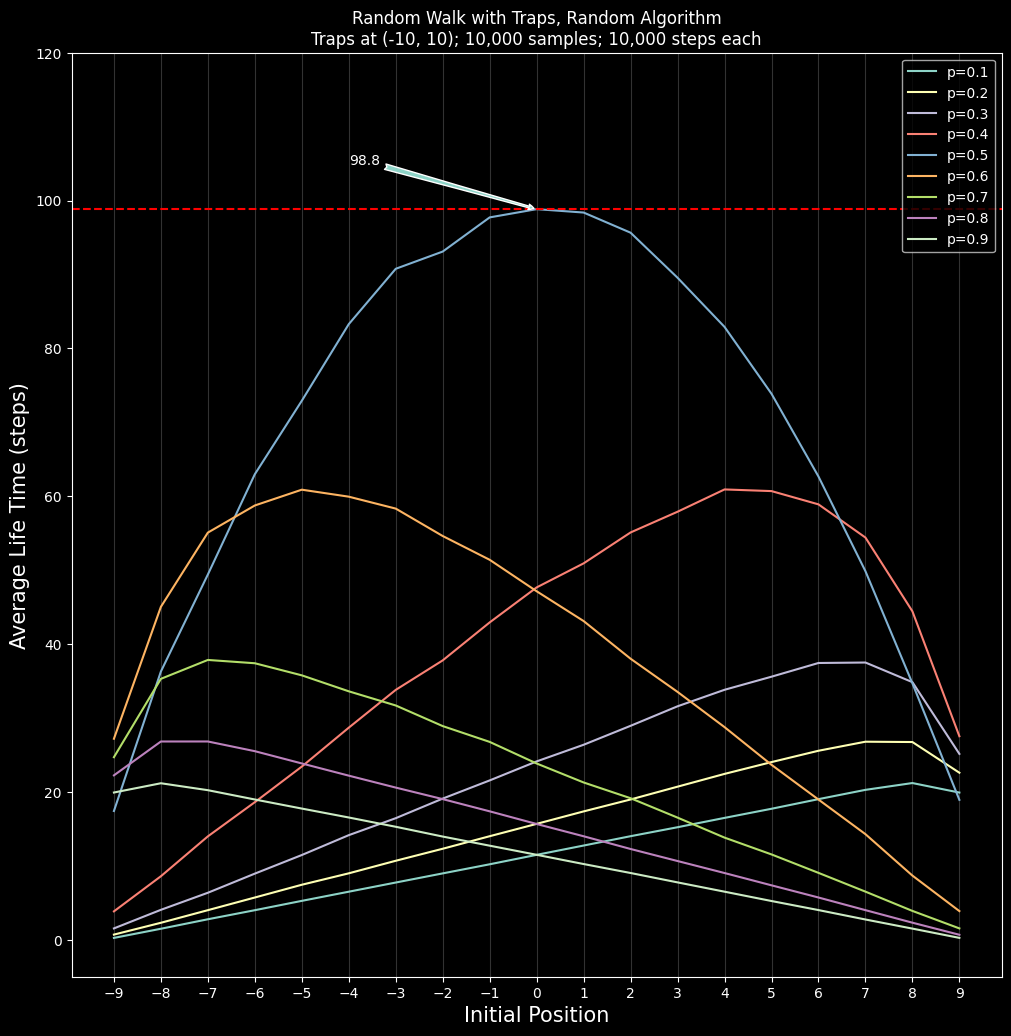

In [73]:
fig, ax = plt.subplots(figsize=(12,12))

# the x values for the plot (basically, it's just the initial positions):
xs = np.arange(traps[0]+1, traps[1], step=1)
# aesthetics:
ax.set_title(f"Random Walk with Traps, Random Algorithm\nTraps at {traps}; 10,000 samples; 10,000 steps each")
ax.set_xlabel("Initial Position", fontsize=15)
ax.set_ylabel("Average Life Time (steps)", fontsize=15)
ax.set_xticks(xs)
# ax.set_xticklabels(labels=xs, rotation=90)
ax.grid(axis="x", alpha=0.2)
# Plotting data:
for i in range(len(probabilites)):
    ax.plot(xs, DDAATTAA[i], label=f"p={probabilites[i]:.1f}")
ax.axhline(DDAATTAA[4].max(), color="red", linestyle="--")
ax.set_ylim((-5,120))
# ax.set_yticks(np.append(ax.get_yticks()[1:], DDAATTAA[4].max()))
ax.annotate(text=f"{DDAATTAA[4].max():.1f}", xy=(0, DDAATTAA[4].max()),
            xytext=(-4, DDAATTAA[4].max()+6), arrowprops={"arrowstyle":"fancy", "connectionstyle":"arc3"})
ax.legend();

In [74]:
# fig.savefig("Exercise5_3_1010.jpg")